In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.graph_objects as go
import warnings

warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_diabetes, load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error, 
        mean_squared_error, mean_absolute_percentage_error, 
        r2_score, accuracy_score, classification_report)
from sklearn.linear_model import LinearRegression, LogisticRegression

In [11]:
data = load_wine()

In [12]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [145]:
df1 = pd.DataFrame(data.data, columns = data.feature_names)

In [84]:
df = pd.read_csv(r"C:\Users\Abhijeet\Desktop\ODA\Cookiecutter\ODA-Stock_Market_Analysis\data\raw\Hdfc Bank\HDFCBANK-2014-2024.csv")

In [85]:
df

,Unnamed: 0,index,Date,Adj Close,Close,High,Low,Open,Volume
0,0,0,2014-10-14 00:00:00+00:00,401.630402,434.174988,442.975006,432.575012,442.500000,3633120
1,1,1,2014-10-15 00:00:00+00:00,401.630402,434.174988,434.174988,434.174988,434.174988,0
2,2,2,2014-10-16 00:00:00+00:00,397.236450,429.424988,437.000000,427.524994,434.200012,2766542
3,3,3,2014-10-17 00:00:00+00:00,409.446960,442.625000,444.049988,428.549988,430.125000,4988960
4,4,4,2014-10-20 00:00:00+00:00,413.401581,446.899994,454.799988,445.075012,447.000000,4766002
...,...,...,...,...,...,...,...,...,...
2466,2466,2466,2024-10-15 00:00:00+00:00,1684.099976,1684.099976,1698.000000,1675.500000,1694.000000,9825565
2467,2467,2467,2024-10-16 00:00:00+00:00,1699.800049,1699.800049,1707.949951,1680.099976,1680.099976,10235341
2468,2468,2468,2024-10-17 00:00:00+00:00,1673.150024,1673.150024,1697.650024,1665.199951,1694.949951,7347866
2469,2469,2469,2024-10-18 00:00:00+00:00,1681.849976,1681.849976,1691.000000,1654.099976,1663.099976,12404862


In [86]:
df = df[['Date', 'Close']]

In [87]:
df

,Date,Close
0,2014-10-14 00:00:00+00:00,434.174988
1,2014-10-15 00:00:00+00:00,434.174988
2,2014-10-16 00:00:00+00:00,429.424988
3,2014-10-17 00:00:00+00:00,442.625000
4,2014-10-20 00:00:00+00:00,446.899994
...,...,...
2466,2024-10-15 00:00:00+00:00,1684.099976
2467,2024-10-16 00:00:00+00:00,1699.800049
2468,2024-10-17 00:00:00+00:00,1673.150024
2469,2024-10-18 00:00:00+00:00,1681.849976


In [88]:
df.dtypes

Date      object
Close    float64
dtype: object

In [89]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

In [90]:
df['Date'] = pd.to_datetime(df['Date'])

In [91]:
df

,Date,Close
0,2014-10-14,434.174988
1,2014-10-15,434.174988
2,2014-10-16,429.424988
3,2014-10-17,442.625000
4,2014-10-20,446.899994
...,...,...
2466,2024-10-15,1684.099976
2467,2024-10-16,1699.800049
2468,2024-10-17,1673.150024
2469,2024-10-18,1681.849976


In [101]:
df = df.resample('B', on='Date').sum(numeric_only=True)

In [102]:
train_data = df[:-100]
test_data = df[-100:]

In [121]:
test_data.sample(10)

,Close
Date,
2024-10-04,1657.650024
2024-08-26,1639.949951
2024-09-04,1641.800049
2024-09-11,1643.900024
2024-10-08,1651.050049
2024-06-20,1669.349976
2024-08-23,1625.050049
2024-10-02,0.000000
2024-07-26,1618.150024


In [104]:
model = SARIMAX(train_data['Close'],order=(2,1,1), seasonal_order=(1, 1, 2, 12))
model_fit = model.fit()

In [140]:
forecast_test = model_fit.forecast(steps = len(test_data['Close']))
forecast_future = model_fit.forecast(steps = 90)

In [141]:
forecast_future

2024-06-04    1474.715809
2024-06-05    1354.641304
2024-06-06    1524.408167
2024-06-07    1604.589281
2024-06-10    1552.808164
                 ...     
2024-10-01    1595.622273
2024-10-02    1659.593144
2024-10-03    1686.162665
2024-10-04    1622.326414
2024-10-07    1698.338427
Freq: B, Name: predicted_mean, Length: 90, dtype: float64

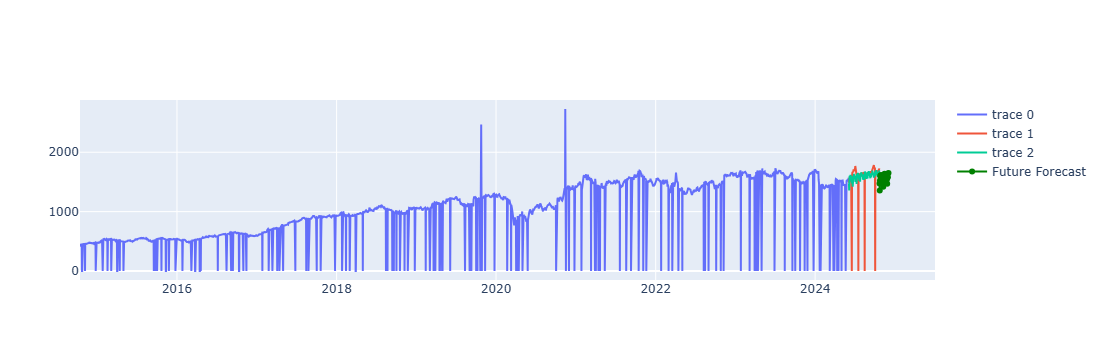

In [142]:
num_months = 30

fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Close']))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Close'], fillcolor='orange'))
fig.add_trace(go.Scatter(x=test_data.index, y=forecast_test))
fig.add_trace(go.Scatter(x=pd.date_range(start=test_data.index[-1] + pd.DateOffset(1), periods=num_months, freq='B'),
                        y=forecast_future, mode='lines+markers', name='Future Forecast', line=dict(color='green')))

fig.show()

In [143]:
r2 = r2_score(test_data['Close'], forecast_test)
mae = mean_absolute_error(test_data['Close'], forecast_test)
mse = mean_squared_error(test_data['Close'], forecast_test)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test_data['Close'], forecast_test)

In [144]:
print("### Accuracy Metrics for Test Set:\n")
print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape*100:.2f}%")

### Accuracy Metrics for Test Set:

R2 Score: -0.01
Mean Absolute Error (MAE): 122.00
Mean Squared Error (MSE): 108648.01
Root Mean Squared Error (RMSE): 329.62
Mean Absolute Percentage Error (MAPE): 28763459607399211008.00%


In [193]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

# Load the wine dataset
wine_data = load_wine()

# Extract features (X) and target (y)
X = wine_data['data']
y = wine_data['target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [201]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

